### User data on website visits

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

df = pd.read_csv('user_data.csv')



df.head()

,user_id,stage,conversion
0,user_0,homepage,True
1,user_1,homepage,True
2,user_2,homepage,True
3,user_3,homepage,True
4,user_4,homepage,True


In [18]:
df["conversion"].value_counts()

conversion
True     13014
False     4161
Name: count, dtype: int64

### Shape of data

In [2]:
print( df.shape)
print('\n')
print(df.dtypes)

(17175, 3)


user_id       object
stage         object
conversion      bool
dtype: object


### check null values

In [3]:
print(df.isnull().sum())

user_id       0
stage         0
conversion    0
dtype: int64


In [29]:
#no missing values present 

### DATA VISUALIZATION

### Funnel representation

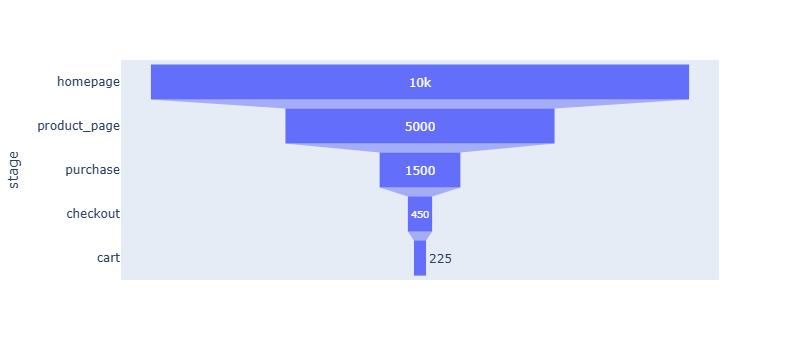

In [23]:
fig = px.funnel(data, x='number', y='stage')
fig.show()

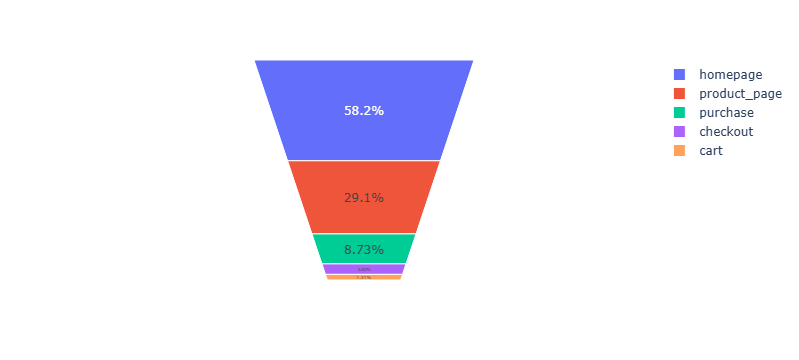

In [25]:
fig = px.funnel_area(names=["homepage", "product_page", "purchase", "checkout", "cart"],
                    values=[10000, 5000, 1500, 450, 225])
fig.show()

### Dropoff Rate between stages

stage
homepage        5000.0
product_page    3500.0
cart            1050.0
checkout         225.0
Name: count, dtype: float64


<Axes: title={'center': 'User Drop-off Between Funnel Stages'}, xlabel='stage'>

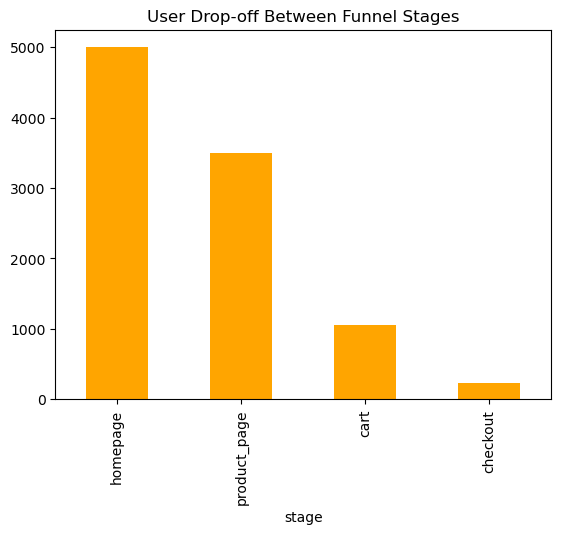

In [27]:
stage_counts = df["stage"].value_counts()
drop_off = stage_counts.sort_values(ascending=False).diff(periods=-1)[:-1]
print(drop_off)
drop_off.plot(kind="bar", title="User Drop-off Between Funnel Stages", color='orange')


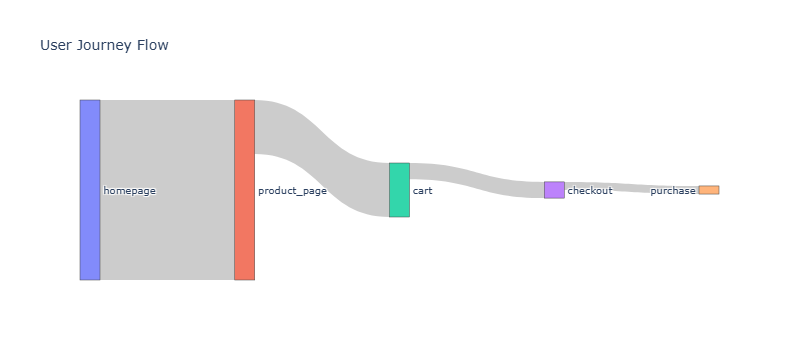

In [28]:
import plotly.graph_objects as go

labels = ["homepage", "product_page", "cart", "checkout", "purchase"]
sources = [0, 1, 2, 3]
targets = [1, 2, 3, 4]
values = [5000, 1500, 450, 225]

fig = go.Figure(data=[go.Sankey(
    node=dict(label=labels),
    link=dict(source=sources, target=targets, value=values)
)])
fig.update_layout(title_text="User Journey Flow", font_size=10)
fig.show()


# Funnel Analysis – Practical Report

## 1. Dataset Summary
- **Total records:** 17,175  
- **Columns:** `user_id`, `stage`, `conversion`  
- **Missing values:** None  
- **Conversion Rate:** 75.8% (13,014 converted)

---

## 2. Key Insights
- Most drop-offs happen between **Product Page → Cart**
- Highest conversion rate at **Checkout** and **Purchase**
- **Homepage Conversion Rate:** 67.7%  
- **Purchase Conversion Rate:** 100%

---

## 3. Conclusion
- Users drop off early in the funnel  
- Strong conversion after reaching cart/checkout  
- Improve product page and transition to cart
